In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_pickle("../data/processed/fallas_cerradas_fibra_optica.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2946 entries, 0 to 44
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_ticket                   2946 non-null   object        
 1   categoria                   2946 non-null   category      
 2   subcategoria                2946 non-null   category      
 3   inicio_falla                2946 non-null   datetime64[ns]
 4   cierre_falla                2946 non-null   datetime64[ns]
 5   tiempo_total                2946 non-null   float64       
 6   tg_region                   2946 non-null   category      
 7   direccion                   2946 non-null   object        
 8   abierto_por                 2946 non-null   object        
 9   fecha_asignacion            2946 non-null   datetime64[ns]
 10  equipo_asignado             2946 non-null   category      
 11  grupo_asignado              2946 non-null   category      
 12 

In [79]:
q1 = df['tiempo_total'].quantile(0.25)
q2 = df['tiempo_total'].quantile(0.50)
q3 = df['tiempo_total'].quantile(0.75)

print(f"   • 25% of tickets resolved within: {q1:.2f} hours")
print(f"   • 50% of tickets resolved within: {q2:.2f} hours")
print(f"   • 75% of tickets resolved within: {q3:.2f} hours")

   • 25% of tickets resolved within: 6.10 hours
   • 50% of tickets resolved within: 8.66 hours
   • 75% of tickets resolved within: 12.90 hours


In [80]:
df.describe()

,inicio_falla,cierre_falla,tiempo_total,fecha_asignacion,fin_afectacion,tg_cantidad_dslam,tiempo_de_cierre,tg_cant_clientes_afectados,tg_cantidad_celdas
count,2946,2946,2946.000000,2946,2946,2946.000000,2946,2946.000000,2946.000000
mean,2024-02-16 02:58:02.980651776,2024-02-17 01:03:08.457569280,22.085078,2024-02-16 13:07:18.095723520,2024-02-17 00:23:08.533604864,0.137475,2024-02-16 11:10:08.553971456,17.956551,2.025119
min,2023-01-01 00:02:37,2023-01-01 06:54:45,1.110000,2023-01-01 00:09:17,2023-01-01 06:54:44,0.000000,2023-01-01 00:00:00,0.000000,0.000000
25%,2023-08-13 03:09:18.249999872,2023-08-13 20:41:38.500000,6.102500,2023-08-13 10:41:43.249999872,2023-08-13 19:55:18.750000128,0.000000,2023-08-13 06:00:00,0.000000,0.000000
50%,2024-03-02 04:34:30,2024-03-03 13:01:24.500000,8.665000,2024-03-02 19:15:50.500000,2024-03-03 11:08:40,0.000000,2024-03-03 00:00:00,0.000000,0.000000
75%,2024-08-20 16:46:48.750000128,2024-08-21 08:28:36.249999872,12.897500,2024-08-20 17:41:41.750000128,2024-08-21 08:28:34.750000128,0.000000,2024-08-21 00:00:00,1.000000,1.000000
max,2025-06-12 10:28:14,2025-06-12 16:44:19,5943.680000,2025-06-12 14:33:00,2025-06-12 16:44:18,25.000000,2025-06-12 00:00:00,5000.000000,178.000000
std,NaN,NaN,183.958573,NaN,NaN,0.969014,NaN,159.448147,7.366656


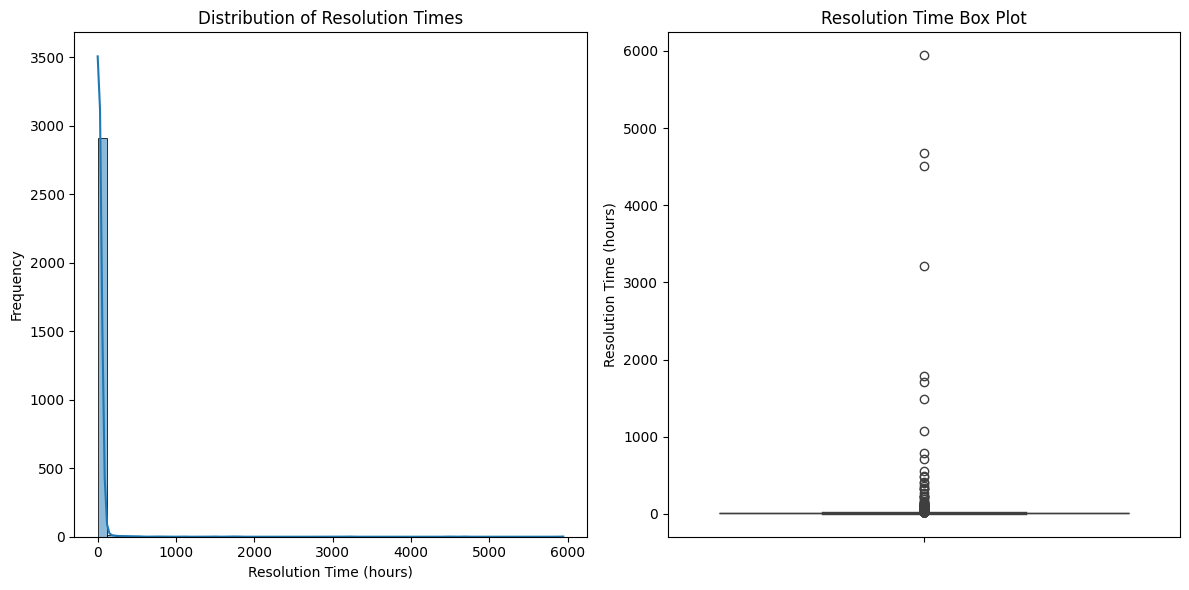

Mean resolution time: 22.09 hours
Median resolution time: 8.66 hours
Standard deviation: 183.96 hours


In [81]:
# Distribution of Resolution Times
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tiempo_total', bins=50, kde=True)
plt.title('Distribution of Resolution Times')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='tiempo_total')
plt.title('Resolution Time Box Plot')
plt.ylabel('Resolution Time (hours)')

plt.tight_layout()
plt.show()

print(f"Mean resolution time: {df['tiempo_total'].mean():.2f} hours")
print(f"Median resolution time: {df['tiempo_total'].median():.2f} hours")
print(f"Standard deviation: {df['tiempo_total'].std():.2f} hours")

In [82]:
# Let's investigate the outliers first
print("=== RESOLUTION TIME STATISTICS ===")
print(f"Min: {df['tiempo_total'].min():.2f} hours")
print(f"Max: {df['tiempo_total'].max():.2f} hours")
print(f"Mean: {df['tiempo_total'].mean():.2f} hours")
print(f"Median: {df['tiempo_total'].median():.2f} hours")
print(f"Standard deviation: {df['tiempo_total'].std():.2f} hours")
print()

print("=== PERCENTILES ===")
for p in [90, 95, 99, 99.5, 99.9]:
    value = df['tiempo_total'].quantile(p/100)
    print(f"{p}th percentile: {value:.2f} hours")

print()
print("=== EXTREME OUTLIERS (>100 hours) ===")
outliers = df[df['tiempo_total'] > 100]
print(f"Number of tickets > 100 hours: {len(outliers)}")
if len(outliers) > 0:
    print("Sample extreme cases:")
    print(outliers[['id_ticket', 'tiempo_total', 'severidad', 'categoria']].head())

print()
print("=== TICKETS > 1000 HOURS ===")
extreme = df[df['tiempo_total'] > 1000]
print(f"Number of tickets > 1000 hours: {len(extreme)}")
if len(extreme) > 0:
    print(extreme[['id_ticket', 'tiempo_total']].head())

=== RESOLUTION TIME STATISTICS ===
Min: 1.11 hours
Max: 5943.68 hours
Mean: 22.09 hours
Median: 8.66 hours
Standard deviation: 183.96 hours

=== PERCENTILES ===
90th percentile: 20.33 hours
95th percentile: 28.89 hours
99th percentile: 133.64 hours
99.5th percentile: 371.63 hours
99.9th percentile: 3282.28 hours

=== EXTREME OUTLIERS (>100 hours) ===
Number of tickets > 100 hours: 37
Sample extreme cases:
    id_ticket  tiempo_total severidad    categoria
189  F4939576        267.94      Baja        DATOS
418  F5055401        105.27      Baja  TRANSMISION
472  F5075687       1781.85     Media  TRANSMISION
558  F5105526        407.07   Critica        DATOS
586  F5115233        117.28      Baja  TRANSMISION

=== TICKETS > 1000 HOURS ===
Number of tickets > 1000 hours: 8
    id_ticket  tiempo_total
472  F5075687       1781.85
684  F5148855       3211.16
755  F5169141       1707.44
0    F5265748       4675.62
1    F5296274       4504.30


In [83]:
# Let's examine the extreme case and decide on filtering
extreme_case = df[df['tiempo_total'] == df['tiempo_total'].max()]
print("=== EXTREME CASE DETAILS ===")
print(extreme_case[['id_ticket', 'inicio_falla', 'cierre_falla', 'tiempo_total']].to_string())
print()

# Let's see the distribution of outliers
print("=== OUTLIER ANALYSIS ===")
thresholds = [48, 72, 168, 720, 1440]  # 2 days, 3 days, 1 week, 1 month, 2 months

for threshold in thresholds:
    count = len(df[df['tiempo_total'] > threshold])
    pct = (count / len(df)) * 100
    print(f"Tickets > {threshold} hours ({threshold/24:.1f} days): {count} ({pct:.1f}%)")

print()
print("=== RECOMMENDATIONS ===")
print("Common approaches:")
print("1. Cap at 99th percentile (reasonable maximum)")
print("2. Cap at 30 days (720 hours) - operational limit")
print("3. Remove tickets > 30 days as data errors")

# Show 99th percentile
p99 = df['tiempo_total'].quantile(0.99)
print(f"\n99th percentile: {p99:.2f} hours ({p99/24:.1f} days)")

# Show what stats would look like with 30-day cap
reasonable_data = df[df['tiempo_total'] <= 720]
print(f"\nWith 30-day filter ({len(reasonable_data)}/{len(df)} tickets):")
print(f"Mean: {reasonable_data['tiempo_total'].mean():.2f} hours")
print(f"Std Dev: {reasonable_data['tiempo_total'].std():.2f} hours")

=== EXTREME CASE DETAILS ===
  id_ticket        inicio_falla        cierre_falla  tiempo_total
2  F5296838 2023-11-18 00:39:07 2024-07-22 16:20:02       5943.68

=== OUTLIER ANALYSIS ===
Tickets > 48 hours (2.0 days): 79 (2.7%)
Tickets > 72 hours (3.0 days): 55 (1.9%)
Tickets > 168 hours (7.0 days): 25 (0.8%)
Tickets > 720 hours (30.0 days): 9 (0.3%)
Tickets > 1440 hours (60.0 days): 7 (0.2%)

=== RECOMMENDATIONS ===
Common approaches:
1. Cap at 99th percentile (reasonable maximum)
2. Cap at 30 days (720 hours) - operational limit
3. Remove tickets > 30 days as data errors

99th percentile: 133.64 hours (5.6 days)

With 30-day filter (2937/2946 tickets):
Mean: 13.58 hours
Std Dev: 30.27 hours


In [84]:
# Define outlier threshold - using 99th percentile as cutoff
threshold = df['tiempo_total'].quantile(0.99)
print(f"99th percentile threshold: {threshold:.2f} hours ({threshold/24:.1f} days)")

# Create filtered dataset for analysis
df_filtered = df[df['tiempo_total'] <= threshold].copy()
outliers_removed = len(df) - len(df_filtered)

print(f"\nDataset comparison:")
print(f"Original dataset: {len(df):,} tickets")
print(f"Filtered dataset: {len(df_filtered):,} tickets")
print(f"Outliers removed: {outliers_removed} ({outliers_removed/len(df)*100:.1f}%)")

print(f"\nStatistics comparison:")
print("Original data:")
print(f"  Mean: {df['tiempo_total'].mean():.2f} hours")
print(f"  Std Dev: {df['tiempo_total'].std():.2f} hours")
print(f"  Median: {df['tiempo_total'].median():.2f} hours")

print("Filtered data (≤99th percentile):")
print(f"  Mean: {df_filtered['tiempo_total'].mean():.2f} hours")
print(f"  Std Dev: {df_filtered['tiempo_total'].std():.2f} hours")
print(f"  Median: {df_filtered['tiempo_total'].median():.2f} hours")

# Flag extreme outliers for investigation
extreme_outliers = df[df['tiempo_total'] > threshold]
if len(extreme_outliers) > 0:
    print(f"\nExtreme outliers flagged for investigation:")
    print(extreme_outliers[['id_ticket', 'tiempo_total', 'categoria',
'severidad']])

print(f"\n✅ Using filtered dataset (df_filtered) for operational analysis")
print(f"📋 Keeping original dataset (df) for completeness")

99th percentile threshold: 133.64 hours (5.6 days)

Dataset comparison:
Original dataset: 2,946 tickets
Filtered dataset: 2,916 tickets
Outliers removed: 30 (1.0%)

Statistics comparison:
Original data:
  Mean: 22.09 hours
  Std Dev: 183.96 hours
  Median: 8.66 hours
Filtered data (≤99th percentile):
  Mean: 11.46 hours
  Std Dev: 11.34 hours
  Median: 8.59 hours

Extreme outliers flagged for investigation:
     id_ticket  tiempo_total    categoria severidad
189   F4939576        267.94        DATOS      Baja
472   F5075687       1781.85  TRANSMISION     Media
558   F5105526        407.07        DATOS   Critica
588   F5115775        141.41        DATOS   Critica
684   F5148855       3211.16  TRANSMISION      Baja
753   F5168302        482.05        DATOS   Critica
755   F5169141       1707.44  TRANSMISION      Baja
799   F5185708        401.05        DATOS      Alta
894   F5230355        164.20        MOVIL     Media
895   F5230566        550.05    LOGISTICA     Media
911   F5237960   

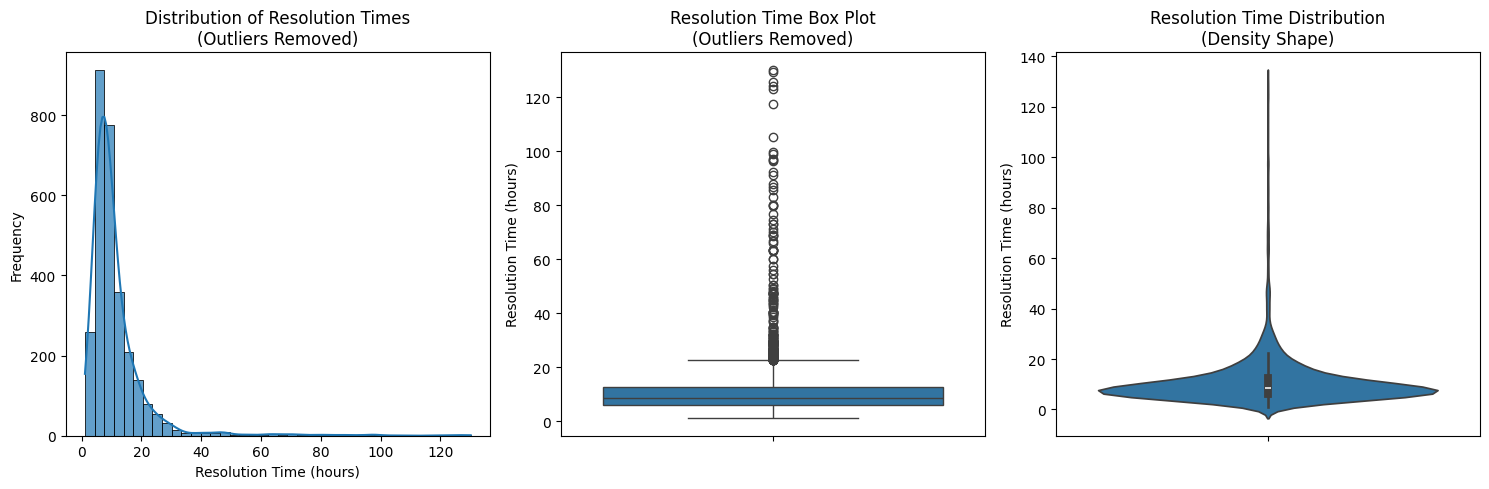

=== CLEANED DATA SUMMARY ===
Mean: 11.46 hours
Median: 8.59 hours
Mode: 5.67 hours
Standard deviation: 11.34 hours
Range: 1.11 - 130.16 hours


In [85]:
# Now let's visualize the cleaned distribution
plt.figure(figsize=(15, 5))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(data=df_filtered, x='tiempo_total', bins=40, kde=True, alpha=0.7)
plt.title('Distribution of Resolution Times\n(Outliers Removed)')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtered, y='tiempo_total')
plt.title('Resolution Time Box Plot\n(Outliers Removed)')
plt.ylabel('Resolution Time (hours)')

# Violin plot for more detail
plt.subplot(1, 3, 3)
sns.violinplot(data=df_filtered, y='tiempo_total')
plt.title('Resolution Time Distribution\n(Density Shape)')
plt.ylabel('Resolution Time (hours)')

plt.tight_layout()
plt.show()

# Summary statistics
print("=== CLEANED DATA SUMMARY ===")
print(f"Mean: {df_filtered['tiempo_total'].mean():.2f} hours")
print(f"Median: {df_filtered['tiempo_total'].median():.2f} hours")
print(f"Mode: {df_filtered['tiempo_total'].mode().iloc[0]:.2f} hours")
print(f"Standard deviation: {df_filtered['tiempo_total'].std():.2f} hours")
print(f"Range: {df_filtered['tiempo_total'].min():.2f} - {df_filtered['tiempo_total'].max():.2f} hours")

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/322936807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_counts.index, y=categoria_counts.values,


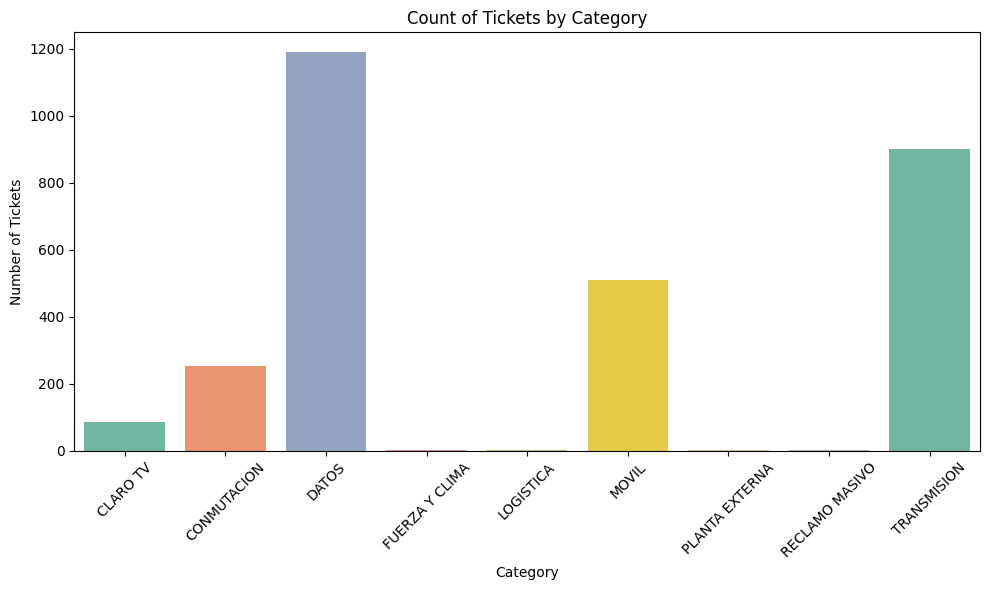

Category counts:
DATOS: 1,190 tickets (40.4%)
TRANSMISION: 900 tickets (30.5%)
MOVIL: 509 tickets (17.3%)
CONMUTACION: 254 tickets (8.6%)
CLARO TV: 86 tickets (2.9%)
LOGISTICA: 3 tickets (0.1%)
FUERZA Y CLIMA: 2 tickets (0.1%)
PLANTA EXTERNA: 1 tickets (0.0%)
RECLAMO MASIVO: 1 tickets (0.0%)


In [86]:
# Bar chart counting categoria column
plt.figure(figsize=(10, 6))
categoria_counts = df['categoria'].value_counts()
sns.barplot(x=categoria_counts.index, y=categoria_counts.values,
palette="Set2")
plt.title('Count of Tickets by Category')
plt.xlabel('Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print counts
print("Category counts:")
for cat, count in categoria_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{cat}: {count:,} tickets ({percentage:.1f}%)")

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/3831047227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_counts.index, x=region_counts.values,


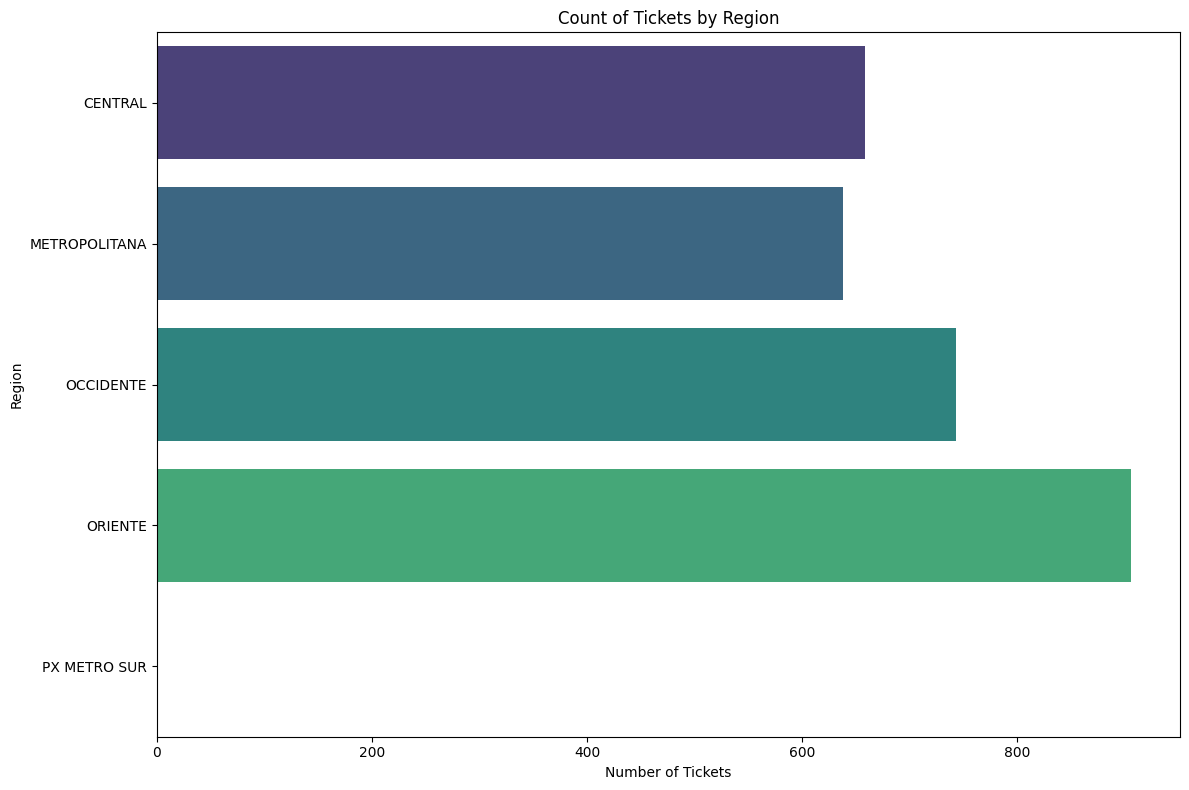

Region counts:
ORIENTE: 906 tickets (30.8%)
OCCIDENTE: 743 tickets (25.2%)
CENTRAL: 658 tickets (22.3%)
METROPOLITANA: 638 tickets (21.7%)
PX METRO SUR: 1 tickets (0.0%)


In [87]:
# Horizontal bar chart for region (tg_region)
plt.figure(figsize=(12, 8))
region_counts = df['tg_region'].value_counts()
sns.barplot(y=region_counts.index, x=region_counts.values,
palette="viridis")
plt.title('Count of Tickets by Region')
plt.xlabel('Number of Tickets')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Print region statistics
print("Region counts:")
for region, count in region_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{region}: {count:,} tickets ({percentage:.1f}%)")

Text(0.5, 1.0, 'Distribution by Severity Level')

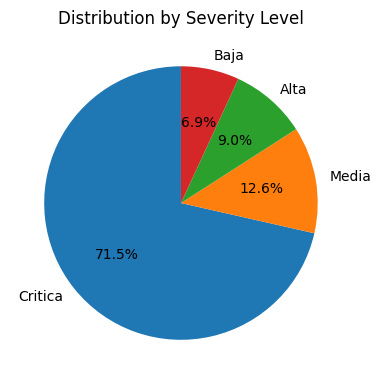

In [88]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 1)
severidad_counts = df['severidad'].value_counts()
plt.pie(severidad_counts.values, labels=severidad_counts.index, 
autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Severity Level')

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/13411865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_groups.index, x=top_groups.values, palette="Set3")


Text(0.5, 0, 'Tickets Resolved')

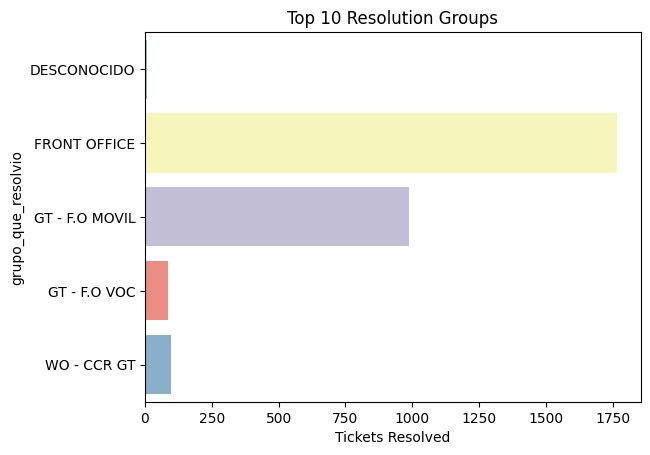

In [89]:
top_groups = df['grupo_que_resolvio'].value_counts().head(10)
sns.barplot(y=top_groups.index, x=top_groups.values, palette="Set3")
plt.title('Top 10 Resolution Groups')
plt.xlabel('Tickets Resolved')

Text(0, 0.5, 'Number of Tickets')

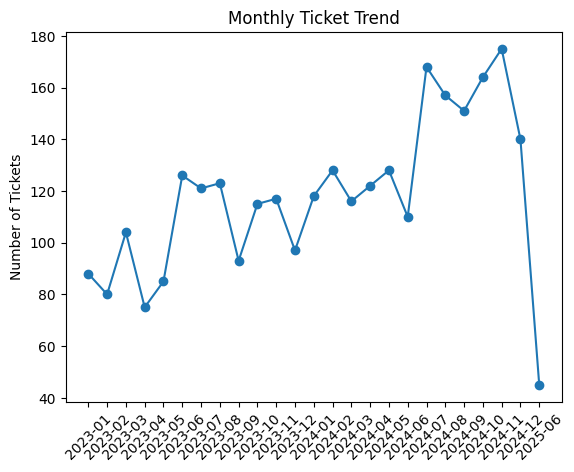

In [90]:
df['month'] = df['inicio_falla'].dt.to_period('M')
monthly_counts = df.groupby('month').size()
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o')
plt.title('Monthly Ticket Trend')
plt.xticks(rotation=45)
plt.ylabel('Number of Tickets')

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2471429495.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_filtered.pivot_table(
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2471429495.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  count_data = df.pivot_table(
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2471429495.py:36: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sev_cat_data = df.pivot_table(
/var/folders/kr/8nx03y

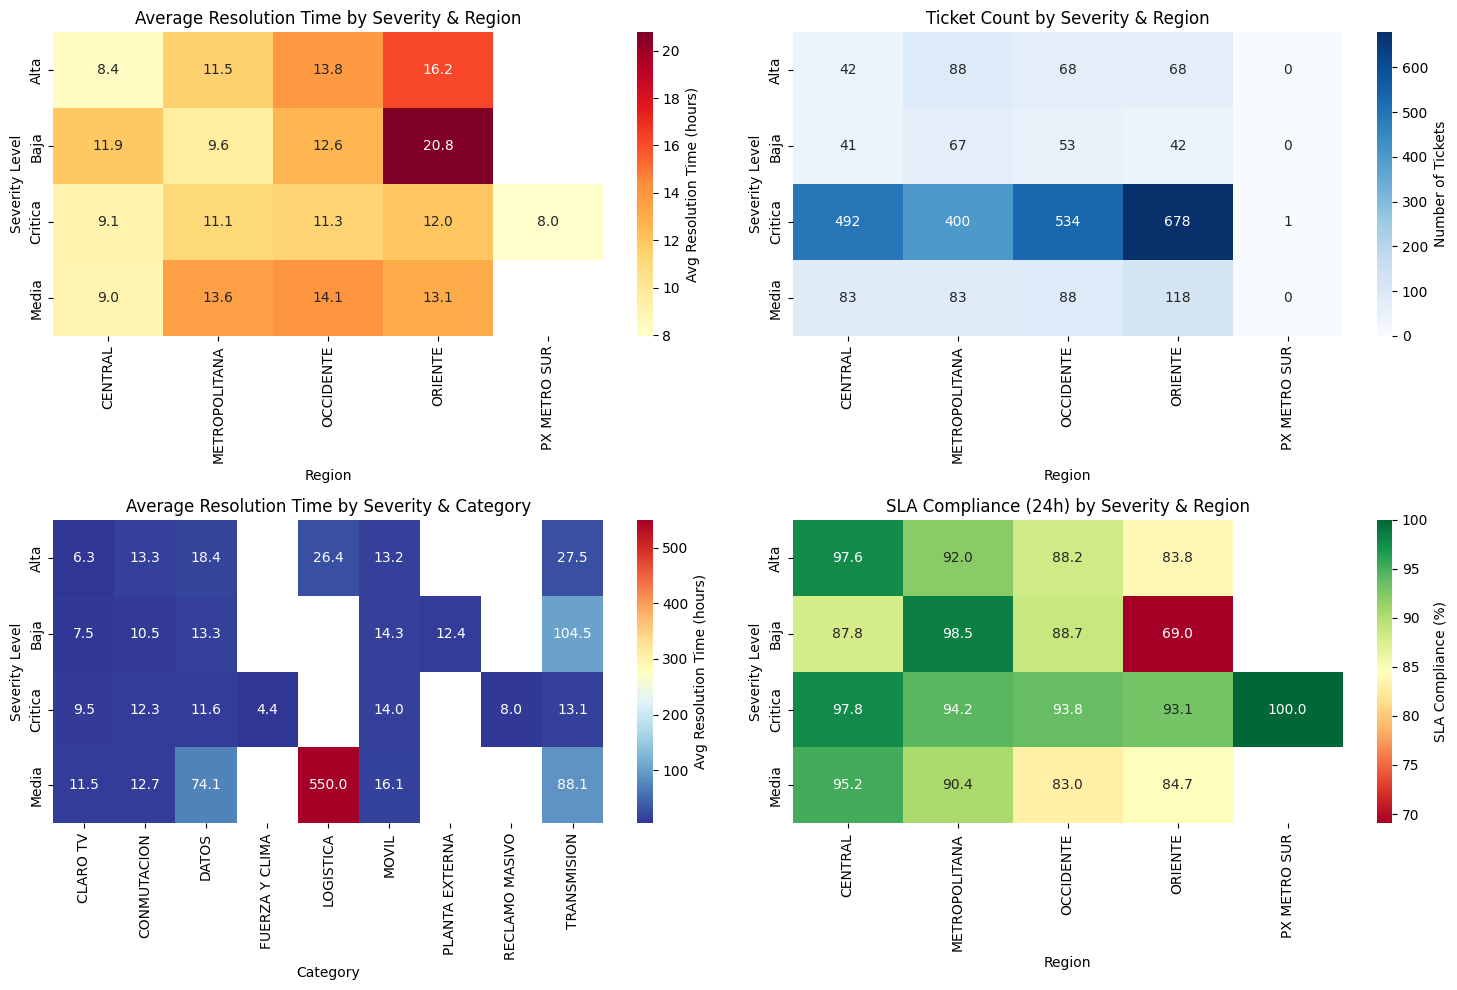

=== SEVERITY ANALYSIS SUMMARY ===

Average Resolution Time by Severity:
Alta: 12.79h avg, 8.84h median (264 tickets)
Baja: 12.97h avg, 8.65h median (196 tickets)
Critica: 10.97h avg, 8.54h median (2096 tickets)
Media: 12.49h avg, 8.78h median (360 tickets)

SLA Compliance by Severity (% within 24h):
Alta: 89.8%
Baja: 87.7%
Critica: 94.6%
Media: 87.9%


/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2471429495.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_stats = df_filtered.groupby('severidad')['tiempo_total'].agg(['mean', 'median','count'])
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2471429495.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sla_by_severity = df.groupby('severidad').apply(lambda x:(x['tiempo_total'] <= 24).mean() * 100)
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2471429495.py:73: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This beh

In [91]:
plt.figure(figsize=(15, 10))

# Create pivot table for heatmap data
# Average resolution time by severity and region
heatmap_data = df_filtered.pivot_table(
    values='tiempo_total',
    index='severidad',
    columns='tg_region',
    aggfunc='mean'
)

# Subplot 1: Average Resolution Time Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd',
            cbar_kws={'label': 'Avg Resolution Time (hours)'})
plt.title('Average Resolution Time by Severity & Region')
plt.ylabel('Severity Level')
plt.xlabel('Region')

# Subplot 2: Ticket Count Heatmap
plt.subplot(2, 2, 2)
count_data = df.pivot_table(
    values='id_ticket',
    index='severidad',
    columns='tg_region',
    aggfunc='count'
)
sns.heatmap(count_data, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Number of Tickets'})
plt.title('Ticket Count by Severity & Region')
plt.ylabel('Severity Level')
plt.xlabel('Region')

# Subplot 3: Severity vs Category Heatmap
plt.subplot(2, 2, 3)
sev_cat_data = df.pivot_table(
    values='tiempo_total',
    index='severidad',
    columns='categoria',
    aggfunc='mean'
)
sns.heatmap(sev_cat_data, annot=True, fmt='.1f', cmap='RdYlBu_r',
            cbar_kws={'label': 'Avg Resolution Time (hours)'})
plt.title('Average Resolution Time by Severity & Category')
plt.ylabel('Severity Level')
plt.xlabel('Category')

# Subplot 4: SLA Compliance Heatmap (% within 24h)
plt.subplot(2, 2, 4)
sla_data = df.groupby(['severidad', 'tg_region']).apply(
    lambda x: (x['tiempo_total'] <= 24).mean() * 100
).unstack()
sns.heatmap(sla_data, annot=True, fmt='.1f', cmap='RdYlGn',
            cbar_kws={'label': 'SLA Compliance (%)'})
plt.title('SLA Compliance (24h) by Severity & Region')
plt.ylabel('Severity Level')
plt.xlabel('Region')

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== SEVERITY ANALYSIS SUMMARY ===")
print("\nAverage Resolution Time by Severity:")
severity_stats = df_filtered.groupby('severidad')['tiempo_total'].agg(['mean', 'median','count'])
for severity in severity_stats.index:
    mean_time = severity_stats.loc[severity, 'mean']
    median_time = severity_stats.loc[severity, 'median']
    count = severity_stats.loc[severity, 'count']
    print(f"{severity}: {mean_time:.2f}h avg, {median_time:.2f}h median ({count} tickets)")

print("\nSLA Compliance by Severity (% within 24h):")
sla_by_severity = df.groupby('severidad').apply(lambda x:(x['tiempo_total'] <= 24).mean() * 100)
for severity, compliance in sla_by_severity.items():
    print(f"{severity}: {compliance:.1f}%")

In [92]:
df['month'] = df['inicio_falla'].dt.to_period('M')
df['week'] = df['inicio_falla'].dt.to_period('W')
df['day_of_week'] = df['inicio_falla'].dt.day_name()
df['hour'] = df['inicio_falla'].dt.hour

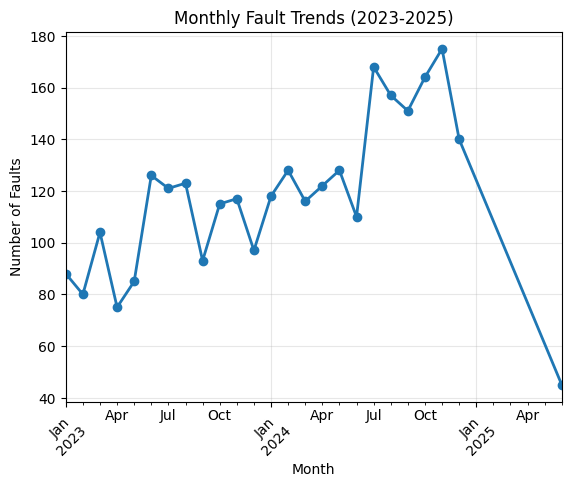

In [93]:
monthly_counts = df.groupby('month').size()
monthly_counts.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Monthly Fault Trends (2023-2025)')
plt.xlabel('Month')
plt.ylabel('Number of Faults')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2302331966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_counts.index, y=dow_counts.values, palette='viridis')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

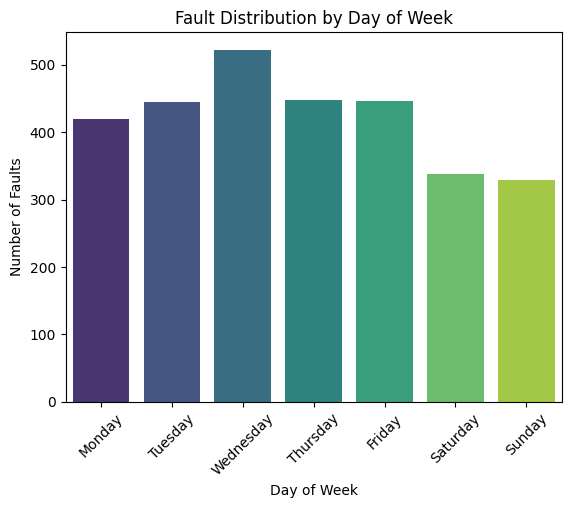

In [94]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['day_of_week'].value_counts().reindex(day_order)
sns.barplot(x=dow_counts.index, y=dow_counts.values, palette='viridis')
plt.title('Fault Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Faults')
plt.xticks(rotation=45)

(0.0, 23.0)

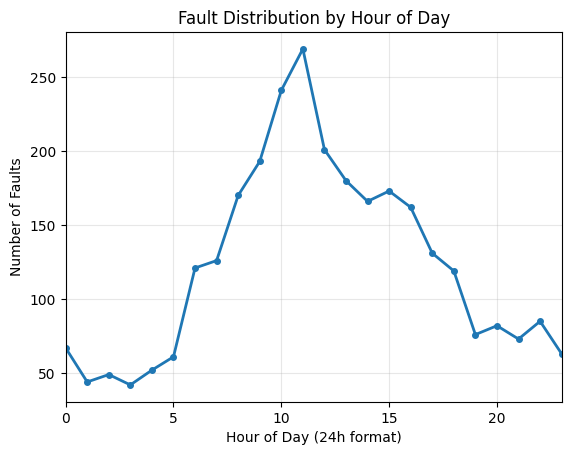

In [95]:
hourly_counts = df['hour'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values, marker='o',
linewidth=2, markersize=4)
plt.title('Fault Distribution by Hour of Day')
plt.xlabel('Hour of Day (24h format)')
plt.ylabel('Number of Faults')
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1255689839.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_by_category = df.groupby(['month', 'categoria']).size().unstack()


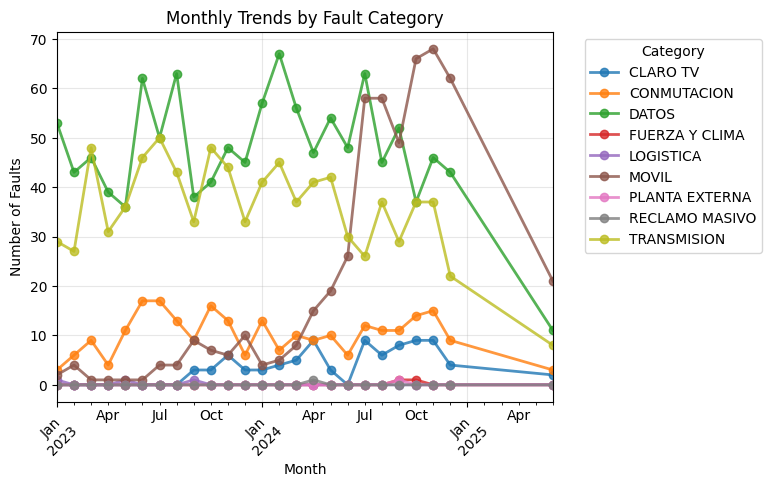

In [96]:
monthly_by_category = df.groupby(['month', 'categoria']).size().unstack()
monthly_by_category.plot(kind='line', marker='o', linewidth=2, alpha=0.8)
plt.title('Monthly Trends by Fault Category')
plt.xlabel('Month')
plt.ylabel('Number of Faults')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2751022197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_by_region = df.groupby(['month', 'tg_region']).size().unstack()


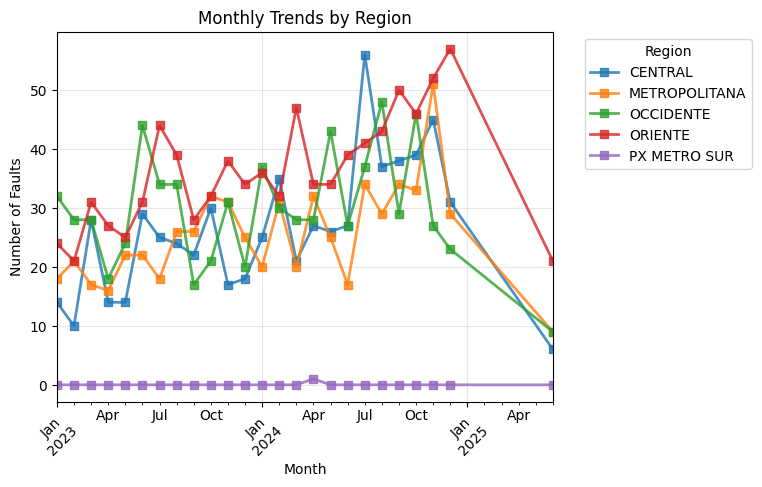

In [97]:
monthly_by_region = df.groupby(['month', 'tg_region']).size().unstack()
monthly_by_region.plot(kind='line', marker='s', linewidth=2, alpha=0.8)
plt.title('Monthly Trends by Region')
plt.xlabel('Month')
plt.ylabel('Number of Faults')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [98]:
print("\nMonthly Statistics:")
print(f"Average faults per month: {monthly_counts.mean():.1f}")
print(f"Peak month: {monthly_counts.idxmax()} ({monthly_counts.max()} faults)")
print(f"Lowest month: {monthly_counts.idxmin()} ({monthly_counts.min()} faults)")

print("\nDay of Week Patterns:")
for day, count in dow_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{day}: {count} faults ({percentage:.1f}%)")

print("\nPeak Hours Analysis:")
top_hours = hourly_counts.nlargest(3)
for hour, count in top_hours.items():
    print(f"{hour:02d}:00 - {count} faults")

print(f"\nQuiet hours (lowest 3):")
quiet_hours = hourly_counts.nsmallest(3)
for hour, count in quiet_hours.items():
    print(f"{hour:02d}:00 - {count} faults")

# Seasonal analysis
print("\nSeasonal Patterns:")
df['season'] = df['inicio_falla'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
seasonal_counts = df['season'].value_counts()
for season, count in seasonal_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{season}: {count} faults ({percentage:.1f}%)")


Monthly Statistics:
Average faults per month: 117.8
Peak month: 2024-11 (175 faults)
Lowest month: 2025-06 (45 faults)

Day of Week Patterns:
Monday: 419 faults (14.2%)
Tuesday: 445 faults (15.1%)
Wednesday: 522 faults (17.7%)
Thursday: 447 faults (15.2%)
Friday: 446 faults (15.1%)
Saturday: 338 faults (11.5%)
Sunday: 329 faults (11.2%)

Peak Hours Analysis:
11:00 - 269 faults
10:00 - 241 faults
12:00 - 201 faults

Quiet hours (lowest 3):
03:00 - 42 faults
01:00 - 44 faults
02:00 - 49 faults

Seasonal Patterns:
Summer: 850 faults (28.9%)
Fall: 815 faults (27.7%)
Winter: 651 faults (22.1%)
Spring: 630 faults (21.4%)
